### Алгоритм Гаффмана

### Алгоритм Гаффмана

In [2]:

import time

Читання з файлу

In [3]:
def read_data(path):
    with open(path, 'r', encoding = 'utf-8') as file:
        data = file.read()
    return data

In [47]:
class huffman():
    """Huffman class which has huffman_compress, huffman_decompress and make_dict methods"""
    def __init__(self, message) -> None:
        """The class constructor, stores the received message and analyzes it, creating the code dictionary for it"""
        self.message = message
        self.dictionary = self.make_dict()

    def make_dict(self):
        """"Analyzes the received class message, creating a code dict from it. Compares the frequencies and using Huffman method assigns
        each unique character a corresponding code"""
        characters = sorted([[ch,self.message.count(ch)] for ch in set(self.message)], key = lambda x: x[1])
        dictionary = {ch: "" for ch in set(self.message)}
        while len(characters)!=1:
            for i in characters[0][0]:
                dictionary[i] += '0'
            for i in characters[1][0]:
                dictionary[i] += '1'
            characters.append([characters[0][0]+characters[1][0], characters[0][1]+characters[1][1]])
            characters = characters[2:]
            characters = sorted(characters, key = lambda x : x[1])
        dictionary = {ch: value[::-1] for ch,value in dictionary.items()}
        return dictionary

    def huffman_compress(self):
        """ Encodes the class received message, replaces all characters with their corresponding codes, sadly does this in string format"""
        message = []
        for i in self.message:
            message.append(self.dictionary[i])
        return " ".join(message)

    def huffman_decompess(self, encoded: str):
        """Receives a message that has been encoded with huffman_compress and decodes it into string"""
        encoded = encoded.split()
        dictionary = {value: ch for ch,value in self.dictionary.items()}
        for ind, val in enumerate(encoded):
            encoded[ind] = dictionary[val]
        return "".join(encoded)

In [48]:
#Let`s compare whether our original file and the encoded then decoded file are the same by storing the decoded version in another file`
a = huffman(read_data('data.txt'))

encoded = a.huffman_compress()
decoded = a.huffman_decompess(encoded)
with open('huffman_dec.txt', 'w', encoding = 'utf-8') as file:
    file.write(decoded)

a = huffman('sdfghjkl;utyrewrtyuoiuhjgvcbnjlkio86redsxcvbjkoi8765redxcvbu')
encoded = a.huffman_compress()

In [49]:
# Let's test our code on different amount of data
if __name__ == "__main__":
    time_code = []
    value = []
    for i in range(10, 10000):
        array_start = list(read_data('data.txt'))[:i]
        a = huffman(array_start)
        start = time.time()
        encode = a.huffman_compress()
        decode = a.huffman_decompess(encode)
        finish = time.time() - start
        time_code.append(finish)
        value.append(i)


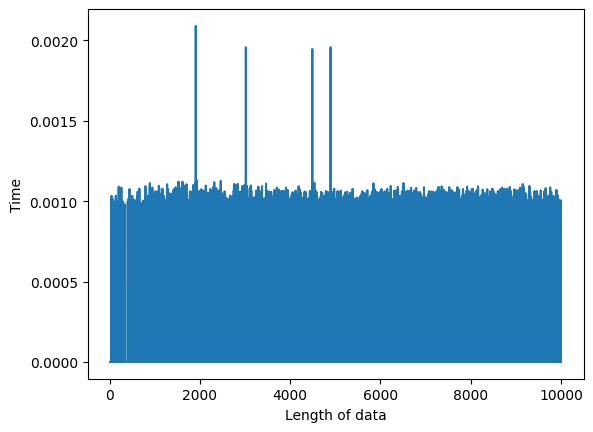

In [6]:
#And visualise it
import matplotlib.pyplot as plt
plt.plot(value, time_code)
plt.xlabel('Length of data')
plt.ylabel('Time')
plt.show()

In [25]:
array_start = list(read_data('data.txt'))
a = huffman(array_start)
encode = a.huffman_compress()
encoded_length = round(len("".join(encode.split()))/8)
print("Для всього файла")
# As we have worked with srings, for us to count how the real Huffman algorithm would work with our code dictionary ,we have to
# get rid of all the spaces in our encoded message and divide it by 8, as that would be the nuber of bytes it would take to store such a message
print(f"Довжина початкового: {len(array_start)} байт")
print(f'Довжина кінцевого : {encoded_length} байт')
print(f"Ступінь стиснення: {(1-encoded_length/len(array_start)) * 100}% ")

array_start = list(read_data('data.txt'))[:1000]
a = huffman(array_start)
encode = a.huffman_compress()
encoded_length = round(len("".join(encode.split()))/8)
print("Стиснення для 1000 символів")
# As we have worked with srings, for us to count how the real Huffman algorithm would work with our code dictionary ,we have to
# get rid of all the spaces in our encoded message and divide it by 8, as that would be the nuber of bytes it would take to store such a message
print(f"Довжина початкового: {len(array_start)} байт")
print(f'Довжина кінцевого : {encoded_length} байт')
print(f"Ступінь стиснення: {(1-encoded_length/len(array_start)) * 100}% ")

array_start = list(read_data('data.txt'))[:500]
a = huffman(array_start)
encode = a.huffman_compress()
encoded_length = round(len("".join(encode.split()))/8)
print("Стиснення для 500 символів")
# As we have worked with srings, for us to count how the real Huffman algorithm would work with our code dictionary ,we have to
# get rid of all the spaces in our encoded message and divide it by 8, as that would be the nuber of bytes it would take to store such a message
print(f"Довжина початкового: {len(array_start)} байт")
print(f'Довжина кінцевого : {encoded_length} байт')
print(f"Ступінь стиснення: {(1-encoded_length/len(array_start)) * 100}% ")

array_start = list(read_data('data.txt'))[:10]
a = huffman(array_start)
encode = a.huffman_compress()
encoded_length = round(len("".join(encode.split()))/8)
print("Стиснення для 10 символів")
# As we have worked with srings, for us to count how the real Huffman algorithm would work with our code dictionary ,we have to
# get rid of all the spaces in our encoded message and divide it by 8, as that would be the nuber of bytes it would take to store such a message
print(f"Довжина початкового: {len(array_start)} байт")
print(f'Довжина кінцевого : {encoded_length} байт')
print(f"Ступінь стиснення: {(1-encoded_length/len(array_start)) * 100}% ")

Для всього файла
Довжина початкового: 2081 байт
Довжина кінцевого : 1135 байт
Ступінь стиснення: 45.458913983661695% 
Стиснення для 1000 символів
Довжина початкового: 1000 байт
Довжина кінцевого : 546 байт
Ступінь стиснення: 45.4% 
Стиснення для 500 символів
Довжина початкового: 500 байт
Довжина кінцевого : 277 байт
Ступінь стиснення: 44.599999999999994% 
Стиснення для 10 символів
Довжина початкового: 10 байт
Довжина кінцевого : 4 байт
Ступінь стиснення: 60.0% 


Можна побачити, що час який витрачає алгоритм, приблизно однаковий для всіх довжин вхідних даних, також легко переконатися, що ступінь стиснення приблизно однаковий для різних даних